In [1]:
#https://colab.research.google.com/drive/1j4i6PelkE7HwkbIRydUdldGQQhzCgV4I?usp=sharing

In [2]:
#Agenda
  #Implementation of Logistic Regression
    # 2 Days Implementation session

  #Import the Data / Read Data
  #EDA

  #Feature selection 
  #Model Building
  #Accuracy 

In [3]:
#Import / Read Data
  #Overview of Problem Statement
  #Overview of Data
  #Importing Data 

In [4]:
#Overview of Problem Statement
  #Bank marketing leads will subscribe to a scheme, Term Deposit(variable y)

In [5]:
#Overview of Data
  #Categorical data regarding Bank Marketing Leads

In [6]:
#import required library
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import style
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [7]:
#load dataset
data=pd.read_csv(r"C:\Users\Aaditya\Desktop\Intellipaat\Jupyter_Notebook_Directory\dataset\bank-additional-full.csv",sep=";")

In [8]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [9]:
#function to check number of rows and columns
data.shape

(41199, 21)

In [10]:
#function to check information about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41199 entries, 0 to 41198
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41195 non-null  float64
 1   job             41194 non-null  object 
 2   marital         41194 non-null  object 
 3   education       41194 non-null  object 
 4   default         41195 non-null  object 
 5   housing         41196 non-null  object 
 6   loan            41195 non-null  object 
 7   contact         41195 non-null  object 
 8   month           41196 non-null  object 
 9   day_of_week     41196 non-null  object 
 10  duration        41196 non-null  float64
 11  campaign        41196 non-null  float64
 12  pdays           41196 non-null  float64
 13  previous        41196 non-null  float64
 14  poutcome        41194 non-null  object 
 15  emp.var.rate    41196 non-null  float64
 16  cons.price.idx  41195 non-null  float64
 17  cons.conf.idx   41196 non-null 

In [11]:
#function to check descriptive summaray of the data
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41195.000000,41196.000000,41196.000000,41196.000000,41196.000000,41196.000000,41195.000000,41196.000000,41196.000000,41196.000000
mean,40.030319,258.281265,2.567676,962.482547,0.173124,0.081656,93.575867,-40.504600,3.620787,5166.996405
std,10.431818,259.254211,2.769751,186.893451,0.494987,1.570894,0.578999,4.629972,1.734655,72.300104
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [12]:
#5 Value summary of Data
  #Min , Q1(25%), Median/Q2(50%), Q3(75%), Max

In [13]:
#function to check the dtypes of features
data.dtypes

age               float64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration          float64
campaign          float64
pdays             float64
previous          float64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [14]:
#function to check diffrent value of column
data.month.value_counts()

may    13769
jul     7174
aug     6178
jun     5318
nov     4109
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64

In [15]:
#Changing the value of y (1=yes and 0=no)
data['y']=np.where(data['y']=='yes',1,0)
data['y']=data['y'].astype(str)

In [16]:
data.y.value_counts()

0    36559
1     4640
Name: y, dtype: int64

In [17]:
#EDA(Exploratory Data Analysis)
  #Missing value Analysis
  #Outlier Analysis

In [18]:
#Missing value analysis
  #checking null values
  #Handling null values

In [19]:
#Checking Null values
data.isnull().sum()

age               4
job               5
marital           5
education         5
default           4
housing           3
loan              4
contact           4
month             3
day_of_week       3
duration          3
campaign          3
pdays             3
previous          3
poutcome          5
emp.var.rate      3
cons.price.idx    4
cons.conf.idx     3
euribor3m         3
nr.employed       3
y                 0
dtype: int64

In [20]:
#Handle Null values
  #if data is large
    #Drop Null Values
      #data.dropna()
  #if data is small
    #if dtype = object
      #replace = Mode
    #else
      #replace = mean

In [21]:
#handling null values
data.dtypes

age               float64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration          float64
campaign          float64
pdays             float64
previous          float64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [22]:
data.month.mode()[0]

'may'

In [23]:
data.age.mean()

40.03031921349678

In [24]:
data.age.median()

38.0

In [25]:
#handling null values
col_list=list(data.columns)

In [26]:
col_list

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'y']

In [27]:
col_list.remove('y')

In [28]:
#function to replace null value with mode and mean as per dtype
for col_name in col_list:
      if(data[col_name].dtypes == 'object'):
            data[col_name] = data[col_name].fillna(data[col_name].mode()[0])
      else:
            data[col_name] = data[col_name].fillna(data[col_name].mean())

In [29]:
#recheck null value
data.isnull().sum().sum()

0

In [30]:
#Outlier Analysis
  #Outlier Detection
  #Outlier removal

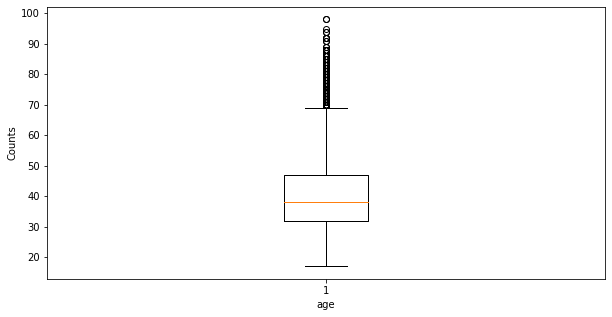

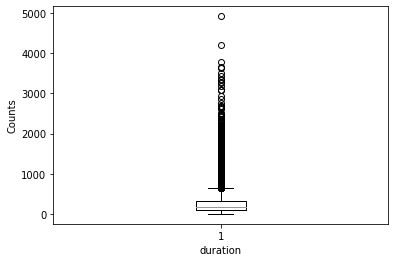

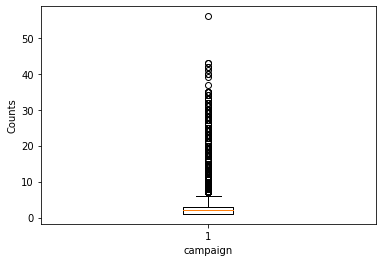

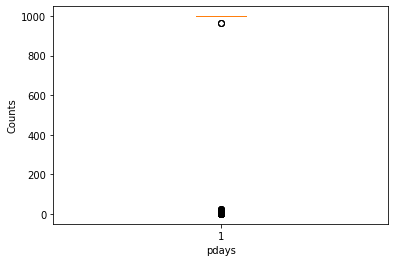

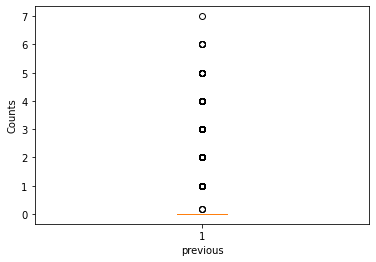

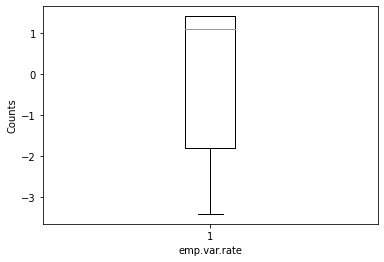

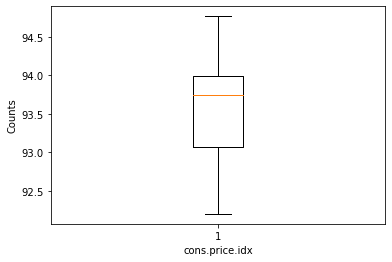

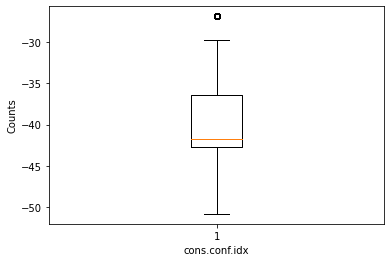

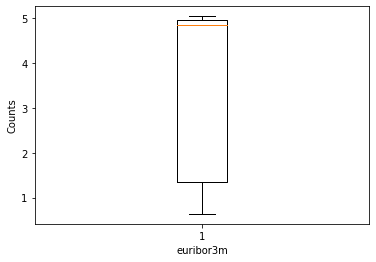

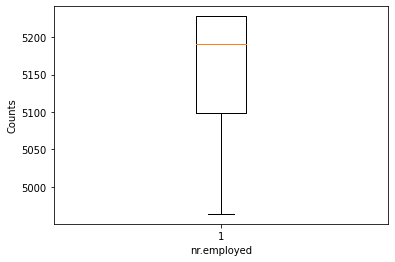

In [31]:
#outlier detection
    #boxplot
#style.use("default")
fig=plt.figure(figsize=(10,5))
for i in col_list:
#if(data[i].dtype =='int64' or data[i].dtype == 'float64')
  if(data[i].dtype != "object"):
    plt.boxplot(data[i])
    plt.xlabel(i)
    plt.ylabel('Counts')
    plt.show()

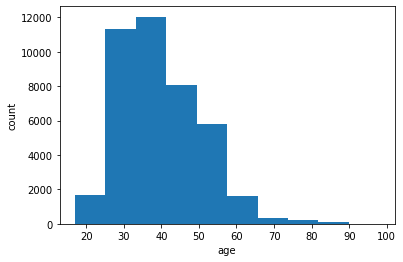

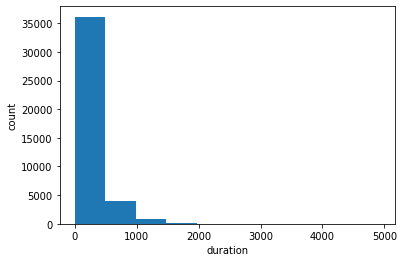

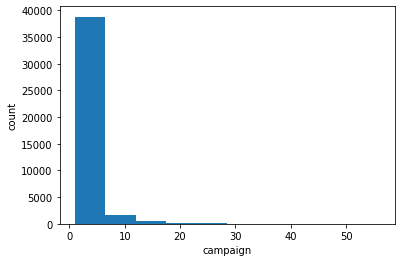

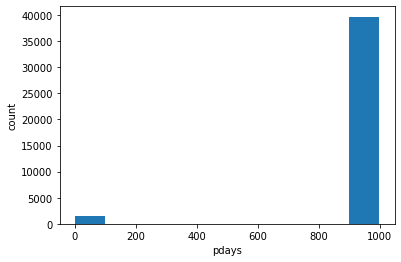

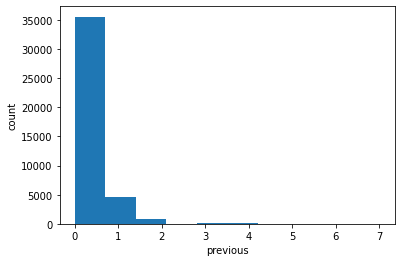

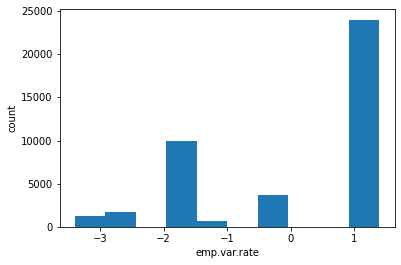

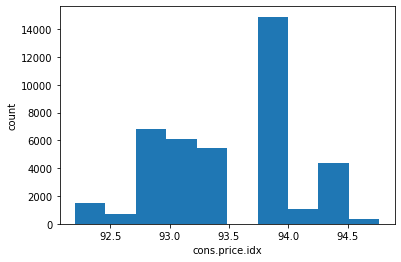

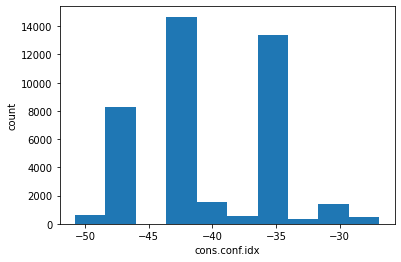

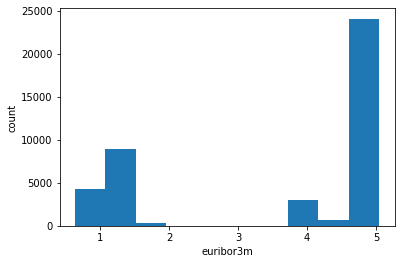

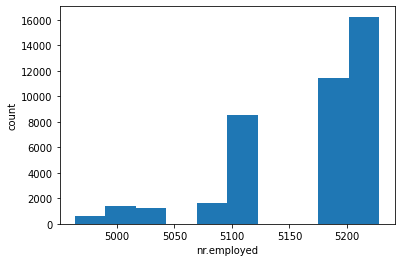

In [32]:
#distribution of the features
for i in col_list:
    if(data[i].dtype != "object"):
        plt.hist(data[i])
        plt.xlabel(i)
        plt.ylabel("count")
        plt.show()

In [33]:
#2 ways to Handling Outliers
  #IQR
  #Mean

In [34]:
#1 mean
print("Higher value allowed : ",data['age'].mean()+3*data['age'].std())
print("Lowest value allowed : ",data['age'].mean()-3*data['age'].std())

Higher value allowed :  71.3242525263679
Lowest value allowed :  8.736385900625685


In [35]:
#IQR 
  # lowest : Q1 - 1.5*IQR
  # highest: Q3 + 1.5*IQR 
q1=data['age'].quantile(0.25)
q3=data['age'].quantile(0.75)
iqr=q3-q1
print("Higer value allow : ",q3+1.5*iqr)
print("lowest value allow : ",q1-1.5*iqr)

Higer value allow :  69.5
lowest value allow :  9.5


In [36]:
#outlier removal
Q1=data.quantile(0.25)
Q3=data.quantile(0.75)
IQR=Q3-Q1

In [37]:
IQR

age                15.000
duration          217.000
campaign            2.000
pdays               0.000
previous            0.000
emp.var.rate        3.200
cons.price.idx      0.919
cons.conf.idx       6.300
euribor3m           3.617
nr.employed       129.000
dtype: float64

In [38]:
#Inter Quartile Range
  # range which provides range between Quartiles

In [39]:
#filtering recording which is not less the lower bracket and not greater than higher bracket value.
data=data[~((data<(Q1-1.5*IQR)) | (data>(Q3+1.5*IQR))).any(axis=1)]

In [40]:
data.shape

(30360, 21)

In [41]:
#above function is similar to this
query=data.age>20
data[query]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41180,36.0,admin.,married,university.degree,no,no,no,cellular,nov,fri,...,2.0,999.0,0.0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41181,37.0,admin.,married,university.degree,no,yes,no,cellular,nov,fri,...,1.0,999.0,0.0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46.0,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1.0,999.0,0.0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56.0,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2.0,999.0,0.0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0


In [42]:
#Bining
#Coverting continious variable into catogorical
# first define bins then perform cut operation
bins=[1,5,10,25,50,75,100]
data['age']=pd.cut(data['age'],bins)

In [43]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,"(50, 75]",housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,"(50, 75]",services,married,high.school,unknown,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,"(25, 50]",services,married,high.school,no,yes,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,"(25, 50]",admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,"(50, 75]",services,married,high.school,no,no,yes,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [44]:
data['age'].value_counts()

(25, 50]     24302
(50, 75]      4949
(10, 25]      1109
(1, 5]           0
(5, 10]          0
(75, 100]        0
Name: age, dtype: int64

# Day 2

In [45]:
#Agenda
  #Feature selection
  #Model Building 
  #Accuracy

In [46]:
#Feature Selection
  #selecting the required/ important features / properties / columns for model

  #Encoding
    #changing object type to numerical
  #VIF
    #process of selecting features on the basis of multicoleaniarity

In [47]:
#Encoding 
  #LabelEncoding

In [48]:
# gender | gender
# Male   | 0
# Female | 1
# Other  | 2

In [49]:
#first check dtypes of the features before encoding
data.dtypes

age               category
job                 object
marital             object
education           object
default             object
housing             object
loan                object
contact             object
month               object
day_of_week         object
duration           float64
campaign           float64
pdays              float64
previous           float64
poutcome            object
emp.var.rate       float64
cons.price.idx     float64
cons.conf.idx      float64
euribor3m          float64
nr.employed        float64
y                   object
dtype: object

In [50]:
#encoding require independent object format data
col_list=[]
for i in data.columns:
    if((data[i].dtype=="object") & (i!="y")):
       col_list.append(i)
col_list.append("age")
col_list

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'age']

In [51]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()

for i in col_list:
    data[i]=label.fit_transform(data[i])

In [52]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,2,3,1,0,0,0,0,1,6,1,...,1.0,999.0,0.0,0,1.1,93.994,-36.4,4.857,5191.0,0
1,2,7,1,3,1,0,0,1,6,1,...,1.0,999.0,0.0,0,1.1,93.994,-36.4,4.857,5191.0,0
2,1,7,1,3,0,2,0,1,6,1,...,1.0,999.0,0.0,0,1.1,93.994,-36.4,4.857,5191.0,0
3,1,0,1,1,0,0,0,1,6,1,...,1.0,999.0,0.0,0,1.1,93.994,-36.4,4.857,5191.0,0
4,2,7,1,3,0,0,2,1,6,1,...,1.0,999.0,0.0,0,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41180,1,0,1,6,0,0,0,0,7,0,...,2.0,999.0,0.0,0,-1.1,94.767,-50.8,1.028,4963.6,0
41181,1,0,1,6,0,2,0,0,7,0,...,1.0,999.0,0.0,0,-1.1,94.767,-50.8,1.028,4963.6,1
41184,1,1,1,5,0,0,0,0,7,0,...,1.0,999.0,0.0,0,-1.1,94.767,-50.8,1.028,4963.6,0
41185,2,5,1,6,0,2,0,0,7,0,...,2.0,999.0,0.0,0,-1.1,94.767,-50.8,1.028,4963.6,0


In [53]:
data.marital.value_counts()

1    18647
2     8305
0     3362
3       46
Name: marital, dtype: int64

In [54]:
#OneHot encoding- > creates extra columns
#gender
#m / f 
#gender m f
# m     1 0   

In [55]:
#VIF : variance inflation factor
  #extract important features on the basis of concept named multicollenearity
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

In [56]:
#Multicollnearity
  #relation between one or more than one column is very high

  #VIF
    #check multicollenearity between data and provides a VIF value 
    #0 - 4 < very less multicollenarity : very important features
    #4 - 5 < less multicollenearity : important features 
    #5 - <6< fair multicollenearity : normal features
    # >6   < High multicollenearity : not needed features

In [57]:
#VIF requires numeric independent columns
col_list=[]
for i in data.columns:
    if((data[i].dtype!="oject") & (i!="y")):
        col_list.append(i)
col_list

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

In [58]:
x=data[col_list]
vif_data=pd.DataFrame()
vif_data["features"]=x.columns
vif_data["VIF"]=[vif(x.values,i) for i in range(len(x.columns))]

In [59]:
vif_data

,features,VIF
0,age,1.099807
1,job,1.025365
2,marital,1.095777
3,education,1.099320
4,default,1.091979
5,housing,1.013153
6,loan,1.003026
7,contact,2.719023
8,month,2.059462
9,day_of_week,1.010873


In [60]:
#now drop the high vif value columns
data = data.drop(['pdays'],axis = 1)

In [61]:
#after each delete recalculate and check vif value and perform same drop as per neeed
#step-1 get all numeric independent columns
col_list=[]
for i in data.columns:
    if((data[i].dtype!="oject") & (i!="y")):
        col_list.append(i)
#step 2 : calculate vif
x=data[col_list]
vif_data=pd.DataFrame()
vif_data["features"]=x.columns
vif_data["VIF"]=[vif(x.values,i) for i in range(len(x.columns))]
vif_data

,features,VIF
0,age,8.703249
1,job,2.095210
2,marital,5.200432
3,education,4.460453
4,default,1.410682
5,housing,2.192741
6,loan,1.208273
7,contact,3.589441
8,month,7.816661
9,day_of_week,3.106289


In [62]:
data=data.drop(["nr.employed"],axis=1)

In [63]:
col_list=[]
for i in data.columns:
    if((data[i].dtype!="oject") & (i!="y")):
        col_list.append(i)
#step 2 : calculate vif
x=data[col_list]
vif_data=pd.DataFrame()
vif_data["features"]=x.columns
vif_data["VIF"]=[vif(x.values,i) for i in range(len(x.columns))]
vif_data

,features,VIF
0,age,8.703184
1,job,2.095170
2,marital,5.199740
3,education,4.460449
4,default,1.409515
5,housing,2.192125
6,loan,1.208172
7,contact,2.749890
8,month,6.752041
9,day_of_week,3.105672


In [64]:
data=data.drop(["cons.price.idx"],axis=1)

In [65]:
col_list=[]
for i in data.columns:
    if((data[i].dtype!="oject") & (i!="y")):
        col_list.append(i)
#step 2 : calculate vif
x=data[col_list]
vif_data=pd.DataFrame()
vif_data["features"]=x.columns
vif_data["VIF"]=[vif(x.values,i) for i in range(len(x.columns))]
vif_data

,features,VIF
0,age,8.404554
1,job,2.086249
2,marital,5.077423
3,education,4.387891
4,default,1.406885
5,housing,2.187296
6,loan,1.207540
7,contact,2.505175
8,month,6.414972
9,day_of_week,3.082770


In [66]:
data=data.drop(["euribor3m"],axis=1)

In [67]:
col_list=[]
for i in data.columns:
    if((data[i].dtype!="oject") & (i!="y")):
        col_list.append(i)
#step 2 : calculate vif
x=data[col_list]
vif_data=pd.DataFrame()
vif_data["features"]=x.columns
vif_data["VIF"]=[vif(x.values,i) for i in range(len(x.columns))]
vif_data

,features,VIF
0,age,7.809775
1,job,2.075524
2,marital,4.973142
3,education,4.199148
4,default,1.406715
5,housing,2.176803
6,loan,1.207275
7,contact,2.495454
8,month,5.782796
9,day_of_week,3.034532


In [68]:
data=data.drop(["cons.conf.idx"],axis=1)

In [69]:
col_list=[]
for i in data.columns:
    if((data[i].dtype!="oject") & (i!="y")):
        col_list.append(i)
#step 2 : calculate vif
x=data[col_list]
vif_data=pd.DataFrame()
vif_data["features"]=x.columns
vif_data["VIF"]=[vif(x.values,i) for i in range(len(x.columns))]
vif_data

,features,VIF
0,age,5.885356
1,job,2.048867
2,marital,4.109692
3,education,3.947833
4,default,1.396176
5,housing,2.109109
6,loan,1.202249
7,contact,2.482859
8,month,5.136100
9,day_of_week,2.893672


In [70]:
data=data.drop(["age"],axis=1)

In [71]:
col_list=[]
for i in data.columns:
    if((data[i].dtype!="oject") & (i!="y")):
        col_list.append(i)
#step 2 : calculate vif
x=data[col_list]
vif_data=pd.DataFrame()
vif_data["features"]=x.columns
vif_data["VIF"]=[vif(x.values,i) for i in range(len(x.columns))]
vif_data

,features,VIF
0,job,2.027048
1,marital,4.109666
2,education,3.727354
3,default,1.337452
4,housing,2.066146
5,loan,1.199312
6,contact,2.482828
7,month,4.858438
8,day_of_week,2.818011
9,duration,2.809123


In [72]:
#delete all nan features and  deleting all high vif value feature (multicollenearity)
data=data.drop(["previous","poutcome"],axis=1)

In [73]:
col_list=[]
for i in data.columns:
    if((data[i].dtype!="oject") & (i!="y")):
        col_list.append(i)
#step 2 : calculate vif
x=data[col_list]
vif_data=pd.DataFrame()
vif_data["features"]=x.columns
vif_data["VIF"]=[vif(x.values,i) for i in range(len(x.columns))]
vif_data

,features,VIF
0,job,2.027048
1,marital,4.109666
2,education,3.727354
3,default,1.337452
4,housing,2.066146
5,loan,1.199312
6,contact,2.482828
7,month,4.858438
8,day_of_week,2.818011
9,duration,2.809123


In [74]:
#done with Feature selection part

# Model Building

In [75]:
x=data[vif_data.features]
y=data.y

In [76]:
#Train,Test and split
from sklearn.model_selection import train_test_split as tts

In [77]:
x_train,x_test,y_train,y_test=tts(x,y,test_size=0.2,random_state=0)

In [78]:
x_train.shape

(24288, 12)

In [79]:
x_test.shape

(6072, 12)

In [80]:
#Model Fitting
    #import logistic regression model from sklearn.linear model package
from sklearn.linear_model import LogisticRegression as lr
logmodel=lr()
logmodel.fit(x_train,y_train)

LogisticRegression()

In [81]:
#Test Model
pred=logmodel.predict(x_test)

In [82]:
#accuracy
#confusion matric and acccuracy score
from sklearn.metrics import confusion_matrix,accuracy_score

In [83]:
#confusion matrix
#accuracy score of the model using matrix
confusion_matrix(y_test,pred)

array([[5674,   76],
       [ 270,   52]], dtype=int64)

In [84]:
#accuracy score
accuracy_score(y_test,pred)

0.9430171277997365

In [85]:
(5674+76)/(5674+76+270+52)

0.946969696969697

In [86]:
#confusion matrix
# 1 2
# 3 4
# 1 : TP : 5670  : pred -> 1 , out -> 1  
# 2 : FP : 80    : pred -> 1 , out -> 0
# 3 : FN : 266   : pred -> 0 , out -> 1  
# 4 : TN : 56    : pred -> 0 , out -> 0  
# formula of accuracy score : 1 + 4 / 1 + 2 + 3 + 4

In [87]:
y_test.head()

10000    0
19392    0
4090     0
4950     0
33624    0
Name: y, dtype: object